# FactBook Data Exploration and Initial Data Processing

__In this notebook file we preprocessed and show initial statistic plots for some features of FactBook data.
We first dowloaded json files for all countries then filtered it by selecting only 20 countries which are in the Now corpus data set including news articles (our second data set). This notebook includes only the data exploration of the factbook data, where we have different geographic, national, economical, social, political and environmental facts about each country. In the initial part we selected only 20 countries and created a proper data frame including 25 features that we decided to work on. In the second part we preprocessed some interesting facts and plot these features per each country. __

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlb
import seaborn as sns
from datetime import datetime, date, time
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')
import os
import glob

### PART 1 : READ AND FILTER DATA SELECT PRE-DETERMINED FEATURES OF INTEREST

In [4]:
#Read data folder of fact book
DATA_FOLDER = './Data'

In [5]:
#Determine country list codes(as presented in factbook) that are included in Now Corpus
country_List=['US', 'EI' ,'AS' ,'UK' ,'CA', 'IN' ,'NZ' ,'SF', 'LK', 'SN', 'PH' ,'GH', 'NI', 'KE',
 'HK', 'JM', 'PK' ,'BG', 'MY' ,'TZ']
#convert the country names to lower cases
country_List=[x.lower() for x in country_List]

In [7]:
#check how many country we have
len(country_List)

20

In [8]:
#check what is inside the factbook data folder 
folders_list=os.listdir(DATA_FOLDER+"/factbook.json")

In [9]:
folders_list

['README.md',
 'south-america',
 'package.json',
 'oceans',
 'world',
 'ALMANAC.md',
 'south-asia',
 '.git',
 'NOTES.md',
 'australia-oceania',
 'MONGO.md',
 'europe',
 'central-asia',
 'central-america-n-caribbean',
 'north-america',
 'LICENSE.md',
 'middle-east',
 'africa',
 'meta',
 'SUMMARY.md',
 'antarctica',
 'east-n-southeast-asia']

In [11]:
#Get Per country json files from factbook data
countryData_List=glob.glob(DATA_FOLDER+"/factbook.json/*/*.json")

In [12]:
#filter out only the selected countries data
ourcountries=[]
for i in country_List:
    for j in countryData_List:
        if i in j[len(j)-7:]:
            ourcountries.append(j)     

In [13]:
#check the json file list of selected countries
ourcountries

['./Data/factbook.json/north-america/us.json',
 './Data/factbook.json/europe/ei.json',
 './Data/factbook.json/australia-oceania/as.json',
 './Data/factbook.json/europe/uk.json',
 './Data/factbook.json/north-america/ca.json',
 './Data/factbook.json/south-asia/in.json',
 './Data/factbook.json/australia-oceania/nz.json',
 './Data/factbook.json/africa/sf.json',
 './Data/factbook.json/south-asia/lk.json',
 './Data/factbook.json/east-n-southeast-asia/sn.json',
 './Data/factbook.json/east-n-southeast-asia/ph.json',
 './Data/factbook.json/africa/gh.json',
 './Data/factbook.json/africa/ni.json',
 './Data/factbook.json/africa/ke.json',
 './Data/factbook.json/east-n-southeast-asia/hk.json',
 './Data/factbook.json/central-america-n-caribbean/jm.json',
 './Data/factbook.json/south-asia/pk.json',
 './Data/factbook.json/south-asia/bg.json',
 './Data/factbook.json/east-n-southeast-asia/my.json',
 './Data/factbook.json/africa/tz.json']

In [14]:
len(ourcountries)

20

In [15]:
#Append all countries data files
worldFactRaw=[]
worldFactRaw.append([pd.read_json(f) for f in ourcountries])
countries=worldFactRaw[0]

In [16]:
#check how many country data we have
len(countries)

20

In [17]:
for p in countries:
    print(p['Government']['Country name']['conventional short form']['text'])

United States
Ireland
Australia
United Kingdom
Canada
India
New Zealand
South Africa
Sri Lanka
Singapore
Philippines
Ghana
Nigeria
Kenya
Hong Kong
Jamaica
Pakistan
Bangladesh
Malaysia
Tanzania


In [18]:
#Get only the selected features per country and properly create a dataframe including each feature s a column
x=''
from pandas import DataFrame as df
factBook = df([p['Government']['Country name']['conventional short form']['text'], 
        p['Geography'][{'Geographic coordinates'}][0]['text'],
        p['Geography'][{'Natural hazards'}][0]['text'],
        p['Geography'][{'Environment - current issues'}][0]['text'],
        x.join(str(p['People and Society'][{'Population'}][0]['text']).split(" ",1)[0].split(',',3)),
        p['People and Society'][{'Age structure'}][0],
        p['People and Society'][{'Religions'}][0]['text'],
        p['People and Society'][{'Ethnic groups'}][0]['text'],
        p['People and Society'][{'Median age'}][0],
        p['People and Society'][{'Population growth rate'}][0]['text'],
        p['People and Society'][{'Birth rate'}][0]['text'].split(' ')[0],
        p['People and Society'][{'Death rate'}][0]['text'],
        p['People and Society'][{'Net migration rate'}][0]['text'],
        p['People and Society'][{'Sex ratio'}][0]['total population']['text'].split(' ')[0],
        p['People and Society'][{'Life expectancy at birth'}][0],
        p['Government'][{'Executive branch'}][0],
        p['Government'][{'Legislative branch'}][0],
        int(p['Economy'][{'GDP - per capita (PPP)'}][0]['text'].split(' ')[0].lstrip('$').replace(',', '')),
        p['Economy'][{'Unemployment rate'}][0]['text'].split('%')[0],
        p['Economy'][{'Population below poverty line'}][0],
        p['Economy'][{'Inflation rate (consumer prices)'}][0]['text'].split('%')[0],
        p['Energy'][{'Electricity - from other renewable sources'}][0]['text'].split('%')[0],
        p['Energy'][{'Carbon dioxide emissions from consumption of energy'}][0]['text'].split(' ')[0],
        p['Communications'][{'Internet users'}][0]['percent of population']['text'].split('%')[0]
        ]
       
        for p in countries)


In [19]:
factBook
#re-assign proper column names
factBook.columns=['Country','Coordinates','Natural_hazards','Environment_issues',
        'Population',
        'Age_structure',
        'Religions',
        'Ethnic_groups',
        'Median age',
        'Population_growth_rate',
        'Birth_rate',
        'Death_rate',
        'Net_migration_rate',
        'Sex_ratio',
        'Life_expectancy_at_birth',
        'Executive_branch',
        'Legislative_branch',
        'GDP_per_capita',
        'Unemployment_rate',
        'Population_below_poverty_line',
        'Inflation_rate',
        'Electricity_renewable_sources',
        'Carbon_dioxide_emissions',
        'Internet_users']

### PART 2 : PRE-PROCESS AND PLOT SOME INTERESTING FEATURES SUCH AS POPULATION, GDP, UNEMPLOYEMENT RATE PER COUNTRY

### Population

In [20]:
factBook['Country']

0      United States
1            Ireland
2          Australia
3     United Kingdom
4             Canada
5              India
6        New Zealand
7       South Africa
8          Sri Lanka
9          Singapore
10       Philippines
11             Ghana
12           Nigeria
13             Kenya
14         Hong Kong
15           Jamaica
16          Pakistan
17        Bangladesh
18          Malaysia
19          Tanzania
Name: Country, dtype: object

In [74]:
factBook['Population'][8]='22235000'

In [75]:
factBook['Population']=factBook['Population'].astype('int')
factBook['Population']

0      323995528
1        4952473
2       22992654
3       64430428
4       35362905
5     1266883598
6        4474549
7       54300704
8       22235000
9        5781728
10     102624209
11      26908262
12     186053386
13      46790758
14       7167403
15       2970340
16     201995540
17     156186882
18      30949962
19      52482726
Name: Population, dtype: int64

In [76]:
factBook['Population'].describe()

count    2.000000e+01
mean     1.309770e+08
std      2.803522e+08
min      2.970340e+06
25%      1.846810e+07
50%      4.107683e+07
75%      1.160149e+08
max      1.266884e+09
Name: Population, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

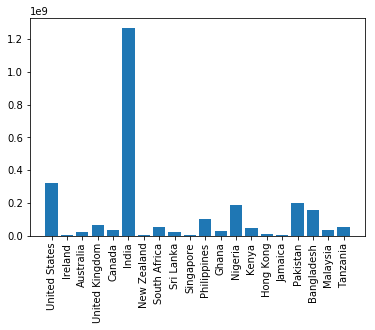

In [77]:
#Plot Population data for selected countries
plt.bar(factBook['Country'],factBook['Population'])
plt.xticks(rotation=90)

__As we see from the statistics and the plot India's population compared to the other countries is very large. In our future analysis while we are grouping the countries per population and check the relationship between the news topics that they are talking about, we can group the countries according to the order of magnitude of the population.__ 

### GDP per capita

In [78]:
factBook['GDP_per_capita'].describe()

count       20.000000
mean     27365.000000
std      26282.479155
min       3100.000000
25%       5700.000000
50%      12200.000000
75%      46850.000000
max      87100.000000
Name: GDP_per_capita, dtype: float64

Text(0,0.5,'GDP_per_capita')

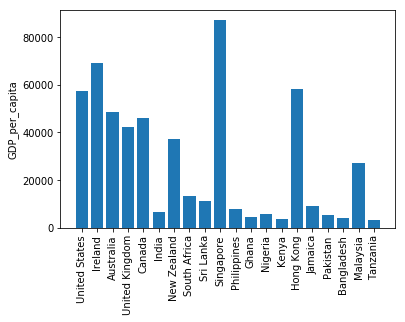

In [79]:
#Plot GDP per capita for selected countries
plt.bar(factBook['Country'],factBook['GDP_per_capita'])
plt.xticks(rotation=90)
plt.ylabel('GDP_per_capita')

__As we see from the statistics and the plot GDP per capita difference changes from 3100 to 87100. In this feature we can check the percentage of topics on the news vs GDP after normalizizng the GDP data. We can also group the countries by 25%, 50% and 75% percentiles values.__ 

### Unemployement Rate

In [80]:
factBook['Unemployment_rate']

0      4.7
1        8
2      5.8
3      5.1
4      7.1
5      8.4
6      5.1
7     26.8
8      4.5
9      2.1
10     6.6
11     5.2
12    23.9
13      40
14     3.6
15    13.8
16     6.7
17     4.9
18     3.3
19      NA
Name: Unemployment_rate, dtype: object

In [81]:
# we have one missing value in Tanzania, we can find it from another source or remove this country from the analysis
# for now, we provided the statistics and plots by excluding this specific country
factBook['Unemployment_rate']=factBook['Unemployment_rate'].replace('NA','-1')
factBook['Unemployment_rate']=factBook['Unemployment_rate'].astype('float')

In [82]:
factBook[factBook['Unemployment_rate']!=-1]['Unemployment_rate'].describe()

count    19.000000
mean      9.768421
std       9.853372
min       2.100000
25%       4.800000
50%       5.800000
75%       8.200000
max      40.000000
Name: Unemployment_rate, dtype: float64

Text(0,0.5,'Unemployement Rate %')

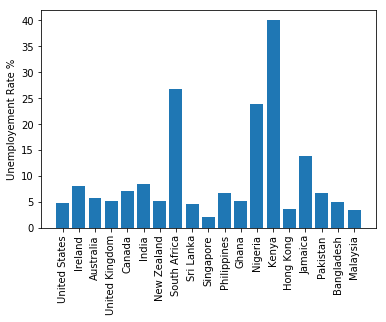

In [83]:
#Plot GDP per capita for selected countries except nan values
plt.bar(factBook[factBook['Unemployment_rate']!=-1]['Country'],factBook[factBook['Unemployment_rate']!=-1]['Unemployment_rate'])
plt.xticks(rotation=90)
plt.ylabel('Unemployement Rate %')

__Unemployement percentages of the countries changes from 2.1% to 40% of the population. In this data we have values from years ranging from 2006 to 2017. 
We will check if the values belong to earlier than 2015 is consistant or not from the Internet then update the results before correlating with the news data.__ 

### Birth Rate 
(the average annual number of births during a year per 1,000 persons in the population at midyear)

In [84]:
factBook['Birth_rate']=factBook['Birth_rate'].astype('float')

In [85]:
factBook['Birth_rate'].describe()

count    20.000000
mean     18.975000
std       8.361055
min       8.400000
25%      12.400000
50%      18.500000
75%      22.725000
max      37.300000
Name: Birth_rate, dtype: float64

Text(0,0.5,'Birth Rate per 1000')

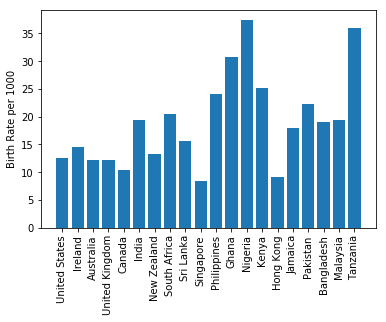

In [86]:
#Plot Birth_rate for selected countries number/1000
plt.bar(factBook['Country'],factBook['Birth_rate'])
plt.xticks(rotation=90)
plt.ylabel('Birth Rate per 1000')

### Sex ratio male/female

In [87]:
factBook['Sex_ratio']=factBook['Sex_ratio'].astype('float')

In [88]:
factBook['Sex_ratio'].describe()

count    20.000000
mean      0.992000
std       0.043359
min       0.870000
25%       0.970000
50%       0.990000
75%       1.010000
max       1.080000
Name: Sex_ratio, dtype: float64

Text(0,0.5,'Sex_ratio (male/female)')

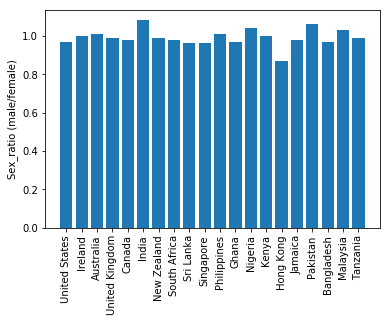

In [89]:
#Plot Sex_ratio (male/female) for selected countries populations
plt.bar(factBook['Country'],factBook['Sex_ratio'])
plt.xticks(rotation=90)
plt.ylabel('Sex_ratio (male/female)')

### Population below poverty line

In [90]:
factBook['Population_below_poverty_line']

0                         {'text': '15.1% (2010 est.)'}
1                          {'text': '8.2% (2013 est.)'}
2                                       {'text': 'NA%'}
3                           {'text': '15% (2013 est.)'}
4     {'text': '9.4%', 'note': {'text': 'this figure...
5                         {'text': '29.8% (2010 est.)'}
6                                       {'text': 'NA%'}
7                         {'text': '35.9% (2012 est.)'}
8                          {'text': '8.9% (2010 est.)'}
9                                       {'text': 'NA%'}
10                        {'text': '25.2% (2012 est.)'}
11                        {'text': '24.2% (2013 est.)'}
12                          {'text': '70% (2010 est.)'}
13                        {'text': '43.4% (2012 est.)'}
14                        {'text': '19.6% (2012 est.)'}
15                        {'text': '16.5% (2009 est.)'}
16                      {'text': '22.3% (FY2005 est.)'}
17                        {'text': '31.5% (2010 

Since the data time changes from 2005 to 2013 we decided not to use this feature of the data set to correlate with news data.

### Inflation rate (%)

In [91]:
factBook['Inflation_rate']=factBook['Inflation_rate'].astype('float')

In [92]:
factBook['Inflation_rate'].describe()

count    20.000000
mean      4.185000
std       4.754198
min      -0.800000
25%       1.375000
50%       2.550000
75%       5.600000
max      17.800000
Name: Inflation_rate, dtype: float64

Text(0,0.5,'Inflation_rate (%)')

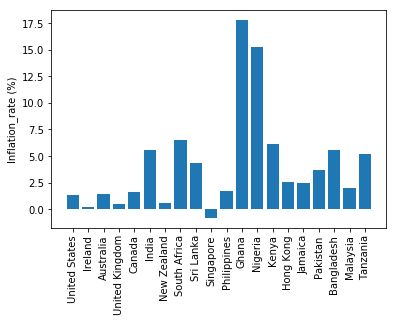

In [93]:
#Plot Inflation_rate (%) for selected countries 
plt.bar(factBook['Country'],factBook['Inflation_rate'])
plt.xticks(rotation=90)
plt.ylabel('Inflation_rate (%)')

### Percentage of Electricity from renewable sources

In [94]:
factBook['Electricity_renewable_sources']=factBook['Electricity_renewable_sources'].astype('float')

In [95]:
factBook['Electricity_renewable_sources'].describe()

count    20.000000
mean      6.435000
std       6.887385
min       0.000000
25%       0.625000
50%       4.900000
75%      11.375000
max      25.000000
Name: Electricity_renewable_sources, dtype: float64

Text(0,0.5,'Electricity from renewable sources (%)')

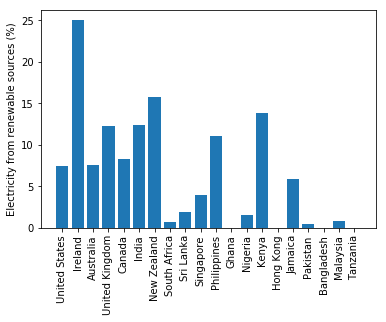

In [96]:
#Plot Percentage of Electricity from renewable sources¶ (%) for selected countries 
plt.bar(factBook['Country'],factBook['Electricity_renewable_sources'])
plt.xticks(rotation=90)
plt.ylabel('Electricity from renewable sources (%)')

### Carbon dioxide emissions from consumption of energy

(This entry is the total amount of carbon dioxide, measured in metric tons, released by burning fossil fuels in the process of producing and consuming energy.)

In [97]:
factBook['Carbon_dioxide_emissions']=factBook['Carbon_dioxide_emissions'].astype('float')

In [98]:
factBook.loc[factBook['Carbon_dioxide_emissions']<6,'Carbon_dioxide_emissions']= factBook[factBook['Carbon_dioxide_emissions']<6]['Carbon_dioxide_emissions']*1000

In [99]:
factBook['Carbon_dioxide_emissions'].describe()

count      20.000000
mean      516.615000
std      1226.249218
min        10.000000
25%        29.500000
50%        93.500000
75%       409.250000
max      5402.000000
Name: Carbon_dioxide_emissions, dtype: float64

Text(0,0.5,'Carbon dioxide emissions from consumption of energy in metric tons')

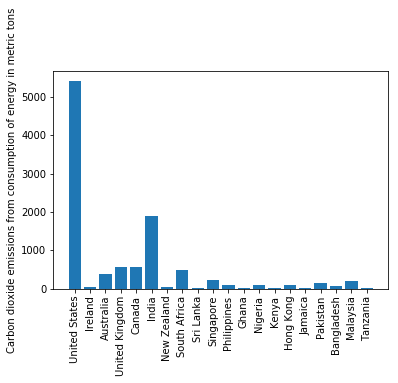

In [100]:
#Plot Carbon dioxide emissions from consumption of energy in metric tons for selected countries 
plt.bar(factBook['Country'],factBook['Carbon_dioxide_emissions'])
plt.xticks(rotation=90)
plt.ylabel('Carbon dioxide emissions from consumption of energy in metric tons')

As we see there are two countries having very large amount of co2 emission compared to the others. We can see the correlations between percentage of news on environmental issues vs co2 emmision.

### Internet users

The percent of population with Internet access (i.e., the penetration rate) helps gauge how widespread Internet use is within a country. Statistics vary from country to country and may include users who access the Internet at least several times a week to those who access it only once within a period of several months

In [21]:
factBook['Internet_users']=factBook['Internet_users'].astype('float')

In [22]:
factBook['Internet_users'].describe()

count    20.000000
mean     54.615000
std      28.845966
min       5.400000
25%      29.000000
50%      49.650000
75%      82.725000
max      92.000000
Name: Internet_users, dtype: float64

Text(0,0.5,'Internet User Percentage')

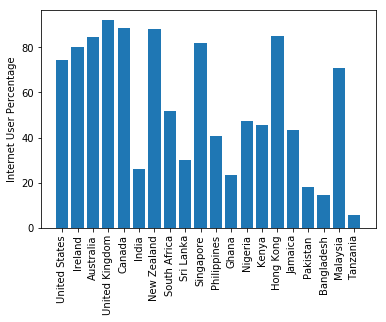

In [23]:
#Plot Internet User percentage for selected countries 
plt.bar(factBook['Country'],factBook['Internet_users'])
plt.xticks(rotation=90)
plt.ylabel('Internet User Percentage')

As we se from the above plot we can divide the internet user groups to above %80, between %50-80, and below %50. Then we can correlate this data with news topic of corresponding country group. It can also be compared to number of news resourse data.

In [25]:
rate=factBook[['Country','Internet_users']]

In [26]:
rate

,Country,Internet_users
0,United States,74.6
1,Ireland,80.1
2,Australia,84.6
3,United Kingdom,92.0
4,Canada,88.5
5,India,26.0
6,New Zealand,88.2
7,South Africa,51.9
8,Sri Lanka,30.0
9,Singapore,82.1


In [30]:
rate.to_csv('./Data/rate.csv',index=False)